In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

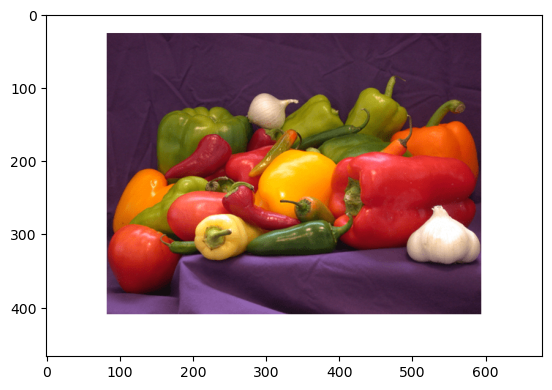

In [4]:
img = cv.imread('peppers.png', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### Mean blur

$kernel_n = \frac{1}{n} 
            \begin{bmatrix} 
                1 & \ldots & a_{1n} \\ 
                \vdots & \ddots & \vdots \\ 
                1 & \ldots & 1 \\ 
            \end{bmatrix} $

$MEAN \ BLUR(A)_n = A * kernel_n $

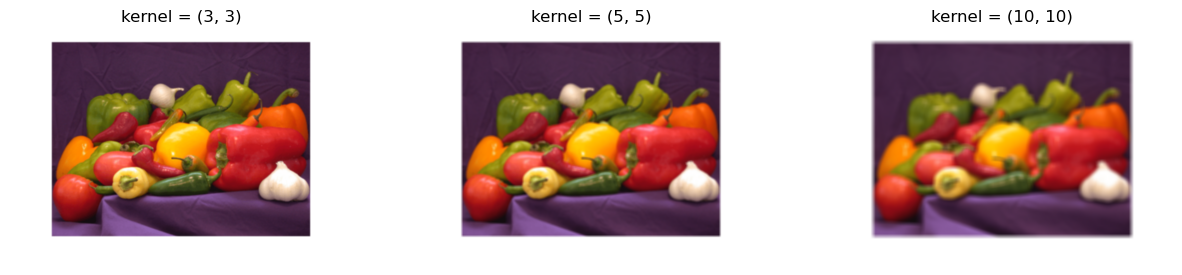

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

for i, val in enumerate([3, 5, 10]):
    media = cv.blur(img, (val, val))
    ax[i].imshow(media)
    ax[i].set_title(f"kernel = ({val}, {val})")
    ax[i].axis('off')
plt.show()

### Median blur
- Melhor para reduzir o	ruído	
- Ordena-­se os vizinhos em ordem crescente.	
- A	mediana	consiste nos m elementos que estão no meio do conjunto	
- Eﬁciente contra ruídos localizados	
- Admite apenas tamanhos ímpares de kernel

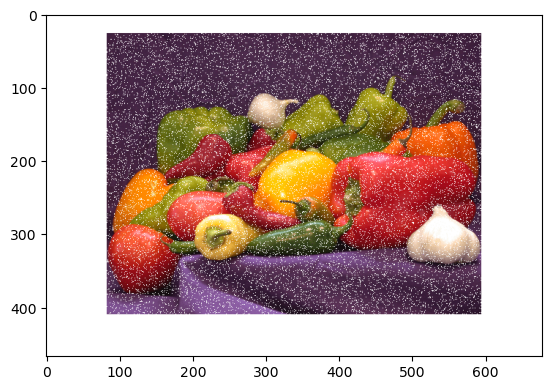

In [40]:
#adicionando ruido para testar 
def salt_and_pepper(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size
    
    # Add salt noise
    num_salt = int(total_pixels * salt_prob)
    salt_coordinates = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[salt_coordinates[0], salt_coordinates[1]] = 255

    # Add pepper noise
    num_pepper = int(total_pixels * pepper_prob)
    pepper_coordinates = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[pepper_coordinates[0], pepper_coordinates[1]] = 0

    return noisy_image

imagem_com_sal = salt_and_pepper(img, 0.03, 0)

plt.imshow(imagem_com_sal)
plt.show()

In [38]:
#Após filtragem com o filtro de mediana: 
#kernelsize = 3
mediana = cv.medianBlur(imagem_com_sal, 3)


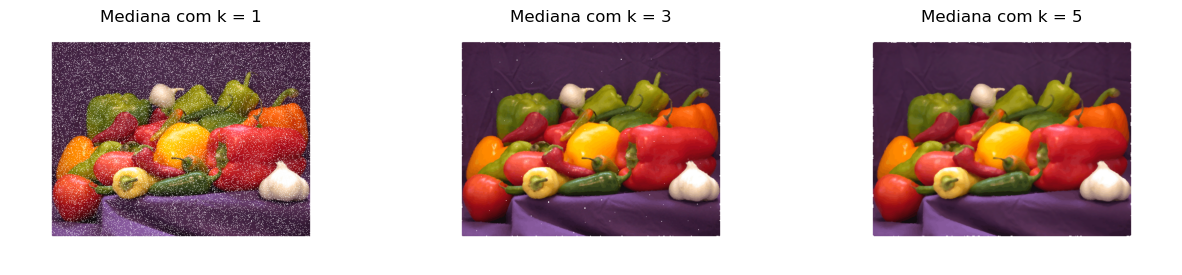

In [39]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

for i, val in enumerate([1, 3, 5]):
    mediana = cv.medianBlur(imagem_com_sal, val)

    ax[i].imshow(mediana)
    ax[i].set_title(f"Mediana com k = {val}")
    ax[i].axis('off')

plt.show()

